# Fundamentals of Data Analysis Tasks

**Kevin Donovan**

****

In [ ]:
#importing standard libraries to use in the tasks
#Numerical arrays and random numbers
import numpy as np
#plotting charts
import matplotlib as plt
#to use datasets
import pandas as pd
#for graphing
import seaborn as sns

Numpy link [numpy API Reference: Random sampling](https://numpy.org/doc/stable/reference/random/index.html)]

# Task 1

> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, ...

The first part is to create the function f(x). We use an if statement to test if a number can be divided evenly by 2. If the number can be divided by 2, the answer is returned otherwise the number is multiplied by 3 with 1 added.

In [ ]:
def f(x):
    # If x is even divide it by two. Using the modulo command % to give the remainder of the division
    if x % 2 == 0:
        return x // 2
    else:
        return (3 * x) + 1

Next we create a function collatz(x) which takes an integer, passes that integer to the F(x) function to establish whether it is odd or even. Depending on the outcome, it returns a result which is again tested for odd or even. When the number gets to 1, the original number that was entered by the user is decremented by 1 and the process starts again.
The code set out below will test the number input by the user, it does this by starting at 1 and running until it reaches the number the user has requested. I have commented out the ability to print the numbers from the test so as to reduce the time taken.

In [ ]:
def collatz(x):
    print(f'Testing the Collatz conjecture using the initial value {x}') 
    #I set a variable count to 0 to keep track of the number that is being sent to the program and I copy the value of the number requested (x) 
    # into the variable valueto use in the while loop
    count = 0
    value = x
    #Using a for loop to iterate over the numbers, range of 1 to the x value in increments of 1
    for i in range(1, x, 1):
        #display the number of the the for loop for confidence that it is running
        print("i = ", i)
        #increment the value of count to show that we have completed the number of iterations required at the end of the programme
        count += 1
        x = value
        #Using a while loop to send the value required to the collatz f(x) calculation function
        while x != 1:
            #print(x, end = ', ')
            x = f(x)
        #The if statement on the next line is checking to see at the end of each while loop that the code reduces to 1 to ensure it is collatz compatible. 
        # If not, it will print the message.
        if x != 1:
          print ("This number is not Collatz compatible!")
        #print("x is: ", x)
        value = value - 1
        #print("value is; ", value)
    #finally, print out the number of times that the function has tested anumber for the conjecture
    print("count : ", count + 1)
    

To run the conjecture, in the below section we see the command collatx(10000), we need to change the number in brackets to the number we wish to test, in this case 10,000. Then run the code.

In [ ]:
collatz(10000)

The value displayed by the variable i shows how many times the for loop has run and the count figure shows the final number of times the code has run. The final count should correspond with the initial number that was entered to be tested and the variable i shows the different numbers that were tested. We see no error message and thus we can assume the conjecture works for number up to 10,000.

****

# End of Task 1

# Task 2

**Overview of the Penguins dataset**

****

The penguins data set contains 345 sets of data relating to three species of penguin. The Data was collected by Dr. Kristen Gorman (https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the Palmer Station, Antarctica LTER (https://pallter.marine.rutgers.edu/), a member of the Long Term Ecological Research Network (https://lternet.edu/). The task asks us to 'Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.'

I start by copying the penguins spreadsheet into a dataframe. I have displayed this to show the data it contains. As can be seen, there are 7 columns of data comprising of floating point numbers and strings. This mixture of datatypes is the main reason why we use Pandas Dataframes to manipulate the data as opposed to using arrays in Numpy. The dataframe can use more than one datatype.

In [ ]:
Penguins_Dataset = 'data\penguins.csv'
df = pd.read_csv(Penguins_Dataset)
df

As can be seen in the data from the dataframe, there are a number of NaN cells, this means "Not a Number". In the data it is seen that there are at least two rows of missing data which could skew our results. As shown, the data shows 344 rows of data with 7 columns made up of text and numbers. As I just mentioned, some of these rows contain no information other than the species and the island the penguin is from.

Calling the describe function allows me to quickly see how the data is distributed within the dataframe. The counts across each of the columns shows the discrepancies in the number of filled data fields. It should show 344 for each column, but, as can be seen, only 342 counts of data entered are showing. It is only the first two columns that have the full dataset in them. We can deal with having rows with no data by either deleting the rows completely. The other option depending on the dataset, is to use an average of the data in each column. This could have the issue of skewing the data and so would depend on the unique situation for each dataset that could be used. For this data set, we can comfortabley just delete the row as it contains just the species and the island as data.

In [ ]:
print(df.describe())

Using the dropna() function, the rows with no number in them can be cleared

In [ ]:
#Using the dropna() function drops any row that has an NaN in it. There are other methods that can be used to be less coarse
df.dropna()

To identify the datatypes used in the dataset, we use the dtypes command

In [ ]:
df.dtypes

We can see that the datatypes are mixed between object and float64. For our case, object is used to denote text and float64 is a floating point number.

The task asks for an overview of the variable types used in the dataset. As has been noted, the dataset contains a mixture of numbers and text. The columns headings are:

 - species as type text to denote the different species
 
 - island as type text to denote the island the species resides on
 
 - bill length in mm as a number, in the order of tens and to one decimal place
 
 - bill depth in mm	as a number, in the order of tens and to one decimal place
 
 - flipper length in mm	as a number, in the order of hundreds and to one decimal place
 
 - body mass in grams as a number, in the order of thousands and to one decimal place	
 
 - sex as type text to denote the sex of the subject



****

# End of task 2

# Task 3

**data analysis**

****

For this task, we are asked "For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable."

As we can see from the previous task, the variables are made up of 6 columns of data; species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and sex. Species, island, and sex variables consist of text while bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g consist of numbers. The numbers are of the type float, which means we will not be using integer types.

****

# End of task 3

# Task 4

**Entropy of flipping two coins**
 
 We are asked: "Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p"

 A given event's probability of happening shows mathematically (numerically) how likely it is to occur. If an event has a probability of 1, it will always occur, whereas it will never occur if its probability is 0
https://goodcalculators.com/coin-flip-probability-calculator/


****

If we have a probability of 0.5 of getting a head with one coin, we have 0.5 x 0.5 or 0.25 chance of getting two heads with two coins on the first try.

Flipping two coins gives the following probabilities:

|1  |2  | How many heads?
|----|----|----
|H|H|2
|H|T|1
|T|H|1
|T|T|0

There are three possible outcomes that give us at least one heads result. The probability is that we would get two heads once, one head twice, and zero heads once. So, our most likely outcome is three out of four tosses of two coins will give us at least one head and one out of four tosses of the two coins will give us only tails, so long as the coins aren't biased in any way. We are asked  "if we are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p". In the list above, we can see that we have equal probability of getting at least one head, 3 out of 4 times of trying. Our probability is therefore, 75% or 0.75.


The function below is created to compute Shannon's equation of entropy

In [3]:
def H(p):
  return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

Using probability as 0.25, we should get the entropy of using two coins and getting a Heads with both coins in the first attempt

In [3]:
# Entropy of 0.25.
H(0.25)

0.8112781244591328

If we try the same equation, using the probability of 0.75, simulating our coin toss until we get no heads

In [4]:
H(0.75)

0.8112781244591328

Interestingly, we get the same entropy. If we create a plot and show the two probabilities, we see they intersect at the same point on the Y axis, due to the shape of the curve

(array([1.00000000e-08, 1.00009998e-04, 2.00009996e-04, ...,
        9.99799990e-01, 9.99899990e-01, 9.99999990e-01]),
 array([2.80181198e-07, 1.47316638e-03, 2.74617545e-03, ...,
        2.74617545e-03, 1.47316638e-03, 2.80181199e-07]))

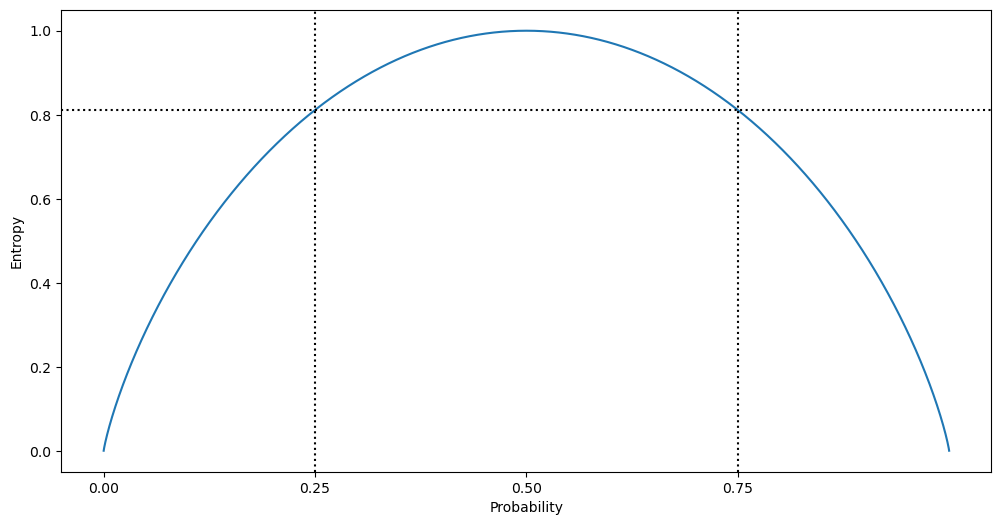

In [11]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# p is a probability.
p = np.linspace(0.00000001, 0.99999999, 10001)

# Plot H(p).
ax.plot(p, H(p));
plt.axhline(y=0.8112781244591328, color="black", linestyle=":")
plt.axvline(x=0.25, color="black", linestyle=":")
plt.axvline(x=0.75, color="black", linestyle=":")
#ax.set_yticks(np.arange(0, 100.1, 100/3))
ax.set_xticks(np.arange(0, 1, 0.25))
plt.xlabel('Probability') 
plt.ylabel('Entropy') 

p , H(p)

# References
https://en.wikipedia.org/wiki/Fair_coin
https://math.stackexchange.com/questions/1424818/flip-2-coins-how-to-show-that-each-point-in-sample-space-has-equal-probability
https://www.geeksforgeeks.org/what-is-a-fair-and-unfair-coin/?ref=ml_lbp
https://math.stackexchange.com/questions/2321905/how-to-find-probability-of-two-coins
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
https://matplotlib.org/stable/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py


****

# End of task 4

# Task 5

In this task we are asked to create an appropriate individual plot for each of the variables in
the penguin data set.

In [ ]:
# From https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

****

# End of task 5

****

# End of assessment